In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

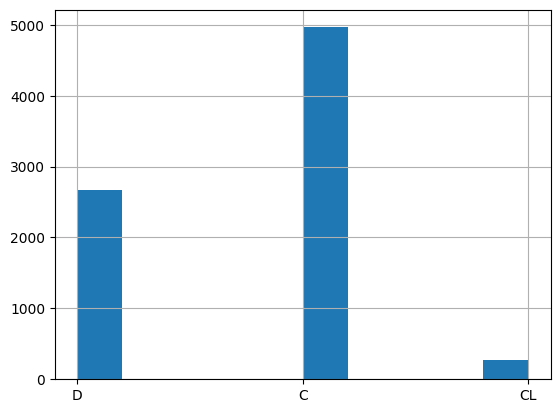

In [5]:
df["Status"].hist()

In [6]:
# unbalanced init!

In [7]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [9]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [10]:
# nothing empty! lez go

In [11]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [12]:
# create train and validation sets that are divided equally

In [13]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [14]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

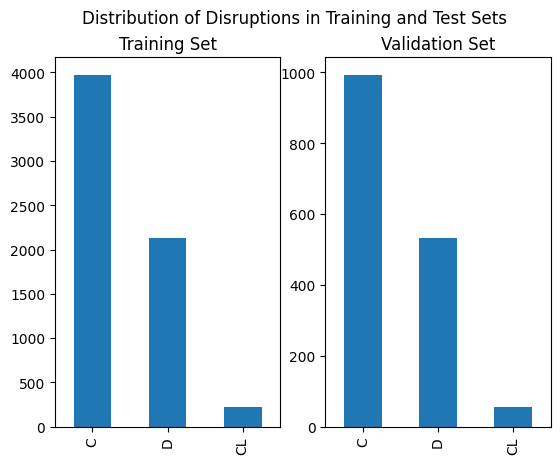

In [15]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [16]:
#the distribution is similar in training and test set

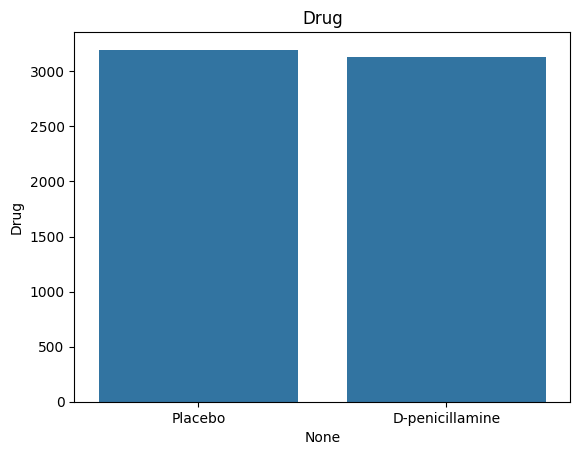

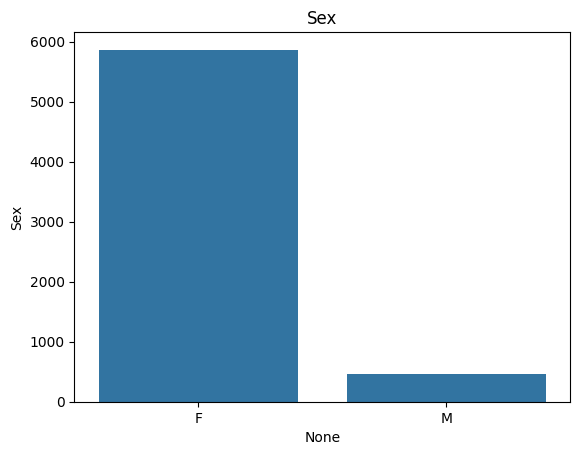

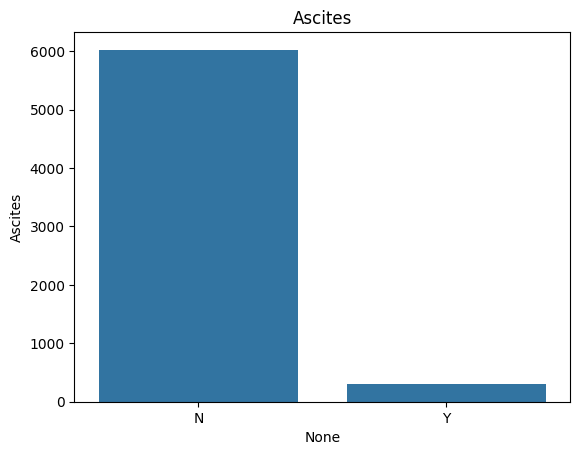

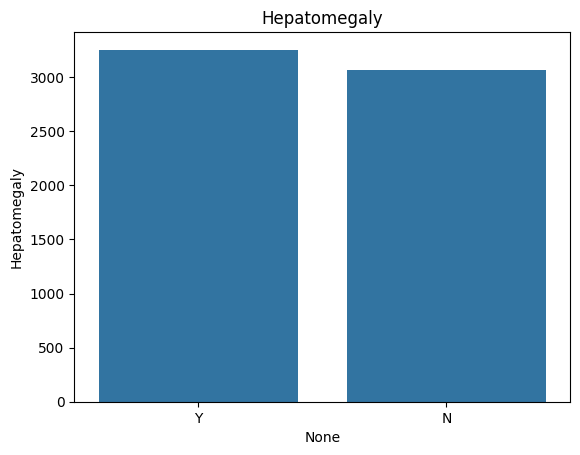

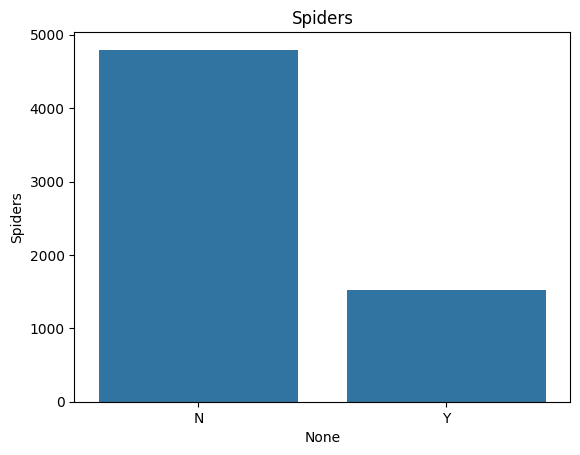

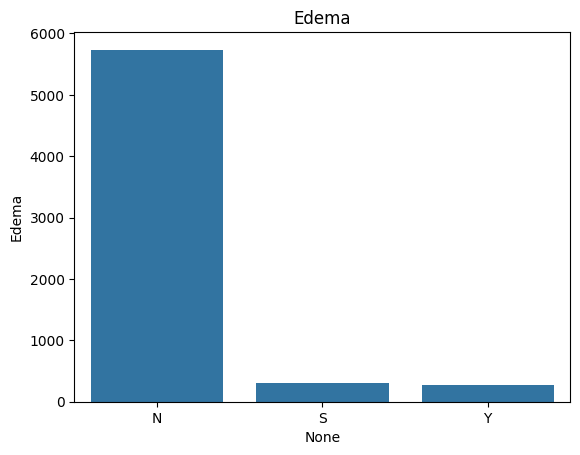

In [17]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [18]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [19]:
# Will do it in the next iteration

In [20]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [21]:
#one hot encode the status and edema

In [22]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [23]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
1370,1370,3395,0,15694,0,0,0,0,N,1.2,808.0,3.76,67.0,720.0,134.85,137.0,312.0,10.1,3.0,C,1,0,0,1,0,0
6118,6118,3050,1,19060,0,0,0,0,N,0.5,271.0,3.00,20.0,1056.0,128.65,55.0,356.0,9.9,2.0,C,1,0,0,1,0,0
1729,1729,1084,0,16858,0,0,1,0,N,2.0,232.0,3.70,11.0,1536.0,100.75,99.0,156.0,11.9,4.0,D,1,0,0,0,0,1
2047,2047,2475,1,19379,0,0,0,0,N,1.2,360.0,3.42,67.0,1134.0,114.70,106.0,311.0,10.5,2.0,C,1,0,0,1,0,0
301,301,2452,0,19060,1,0,1,0,S,1.3,372.0,3.01,227.0,1716.0,167.40,135.0,248.0,12.0,4.0,CL,0,1,0,0,1,0


In [24]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [25]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [26]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
1370,1370,3395,0,15694,0,0,0,0,1.2,808.0,3.76,67.0,720.0,134.85,137.0,312.0,10.1,3.0,1,0,0,1,0,0
6118,6118,3050,1,19060,0,0,0,0,0.5,271.0,3.00,20.0,1056.0,128.65,55.0,356.0,9.9,2.0,1,0,0,1,0,0
1729,1729,1084,0,16858,0,0,1,0,2.0,232.0,3.70,11.0,1536.0,100.75,99.0,156.0,11.9,4.0,1,0,0,0,0,1
2047,2047,2475,1,19379,0,0,0,0,1.2,360.0,3.42,67.0,1134.0,114.70,106.0,311.0,10.5,2.0,1,0,0,1,0,0
301,301,2452,0,19060,1,0,1,0,1.3,372.0,3.01,227.0,1716.0,167.40,135.0,248.0,12.0,4.0,0,1,0,0,1,0


In [27]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  uint8
S                  uint8
Y                  uint8
C                  uint8
CL                 uint8
D                  uint8
dtype: object

In [28]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [29]:
#visualise corelation matrix

In [30]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.016641,0.001341,-0.000769,-0.009631,0.002025,0.011256,0.005213,0.006677,-0.014103,-0.016236,0.008618,-0.007240,0.018227,-0.003684,-0.005743,0.012322,-0.011706,-0.003181,-0.002658,0.007329,-0.000312,0.017878,-0.006611
N_Days,-0.016641,1.000000,0.000970,-0.100624,-0.061903,-0.255600,-0.277217,-0.197001,-0.343565,-0.152827,0.247368,-0.280889,-0.024408,-0.242483,-0.185374,0.154676,-0.161163,-0.200130,0.242588,-0.095349,-0.243595,0.345188,-0.081115,-0.321476
Drug,0.001341,0.000970,1.000000,0.097307,0.035371,0.043254,-0.054109,0.006809,-0.037926,0.016406,-0.025614,0.004701,0.003421,-0.039685,-0.059323,-0.018077,-0.042958,-0.028676,-0.029020,0.005370,0.035528,-0.024634,0.019301,0.017704
Age,-0.000769,-0.100624,0.097307,1.000000,0.108809,0.160242,0.107633,0.060883,0.100441,-0.043397,-0.118109,0.092925,0.024759,-0.021395,0.026665,-0.095945,0.147054,0.122112,-0.138506,0.070597,0.121983,-0.140999,-0.110212,0.186877
Sex,-0.009631,-0.061903,0.035371,0.108809,1.000000,0.043738,0.057250,-0.024853,0.037142,0.032330,-0.025366,0.164142,0.004332,0.065541,0.082205,-0.037221,0.072782,0.039171,-0.038741,0.054858,-0.003036,-0.118820,0.000339,0.121349
Ascites,0.002025,-0.255600,0.043254,0.160242,0.043738,1.000000,0.184446,0.212144,0.381218,-0.038366,-0.326915,0.291074,0.059092,0.118562,0.139952,-0.185158,0.297592,0.178984,-0.534014,0.096537,0.656189,-0.258241,-0.022175,0.272620
Hepatomegaly,0.011256,-0.277217,-0.054109,0.107633,0.057250,0.184446,1.000000,0.326520,0.298231,0.145461,-0.267677,0.277942,0.135674,0.213015,0.169424,-0.189945,0.252631,0.495888,-0.216567,0.129235,0.170785,-0.393286,0.042819,0.385496
Spiders,0.005213,-0.197001,0.006809,0.060883,-0.024853,0.212144,0.326520,1.000000,0.256145,0.034314,-0.224487,0.261715,0.066488,0.144788,0.085735,-0.174784,0.282866,0.281649,-0.253813,0.128977,0.223951,-0.320024,0.023876,0.317936
Bilirubin,0.006677,-0.343565,-0.037926,0.100441,0.037142,0.381218,0.298231,0.256145,1.000000,0.305554,-0.294705,0.446214,0.136776,0.369084,0.321314,-0.082545,0.294756,0.198160,-0.327120,0.143128,0.313077,-0.416927,0.012618,0.421373
Cholesterol,-0.014103,-0.152827,0.016406,-0.043397,0.032330,-0.038366,0.145461,0.034314,0.305554,1.000000,-0.085436,0.179421,0.132497,0.316299,0.274977,0.081600,0.022862,0.035356,0.031704,-0.005963,-0.038713,-0.193097,0.048152,0.178756


<Axes: >

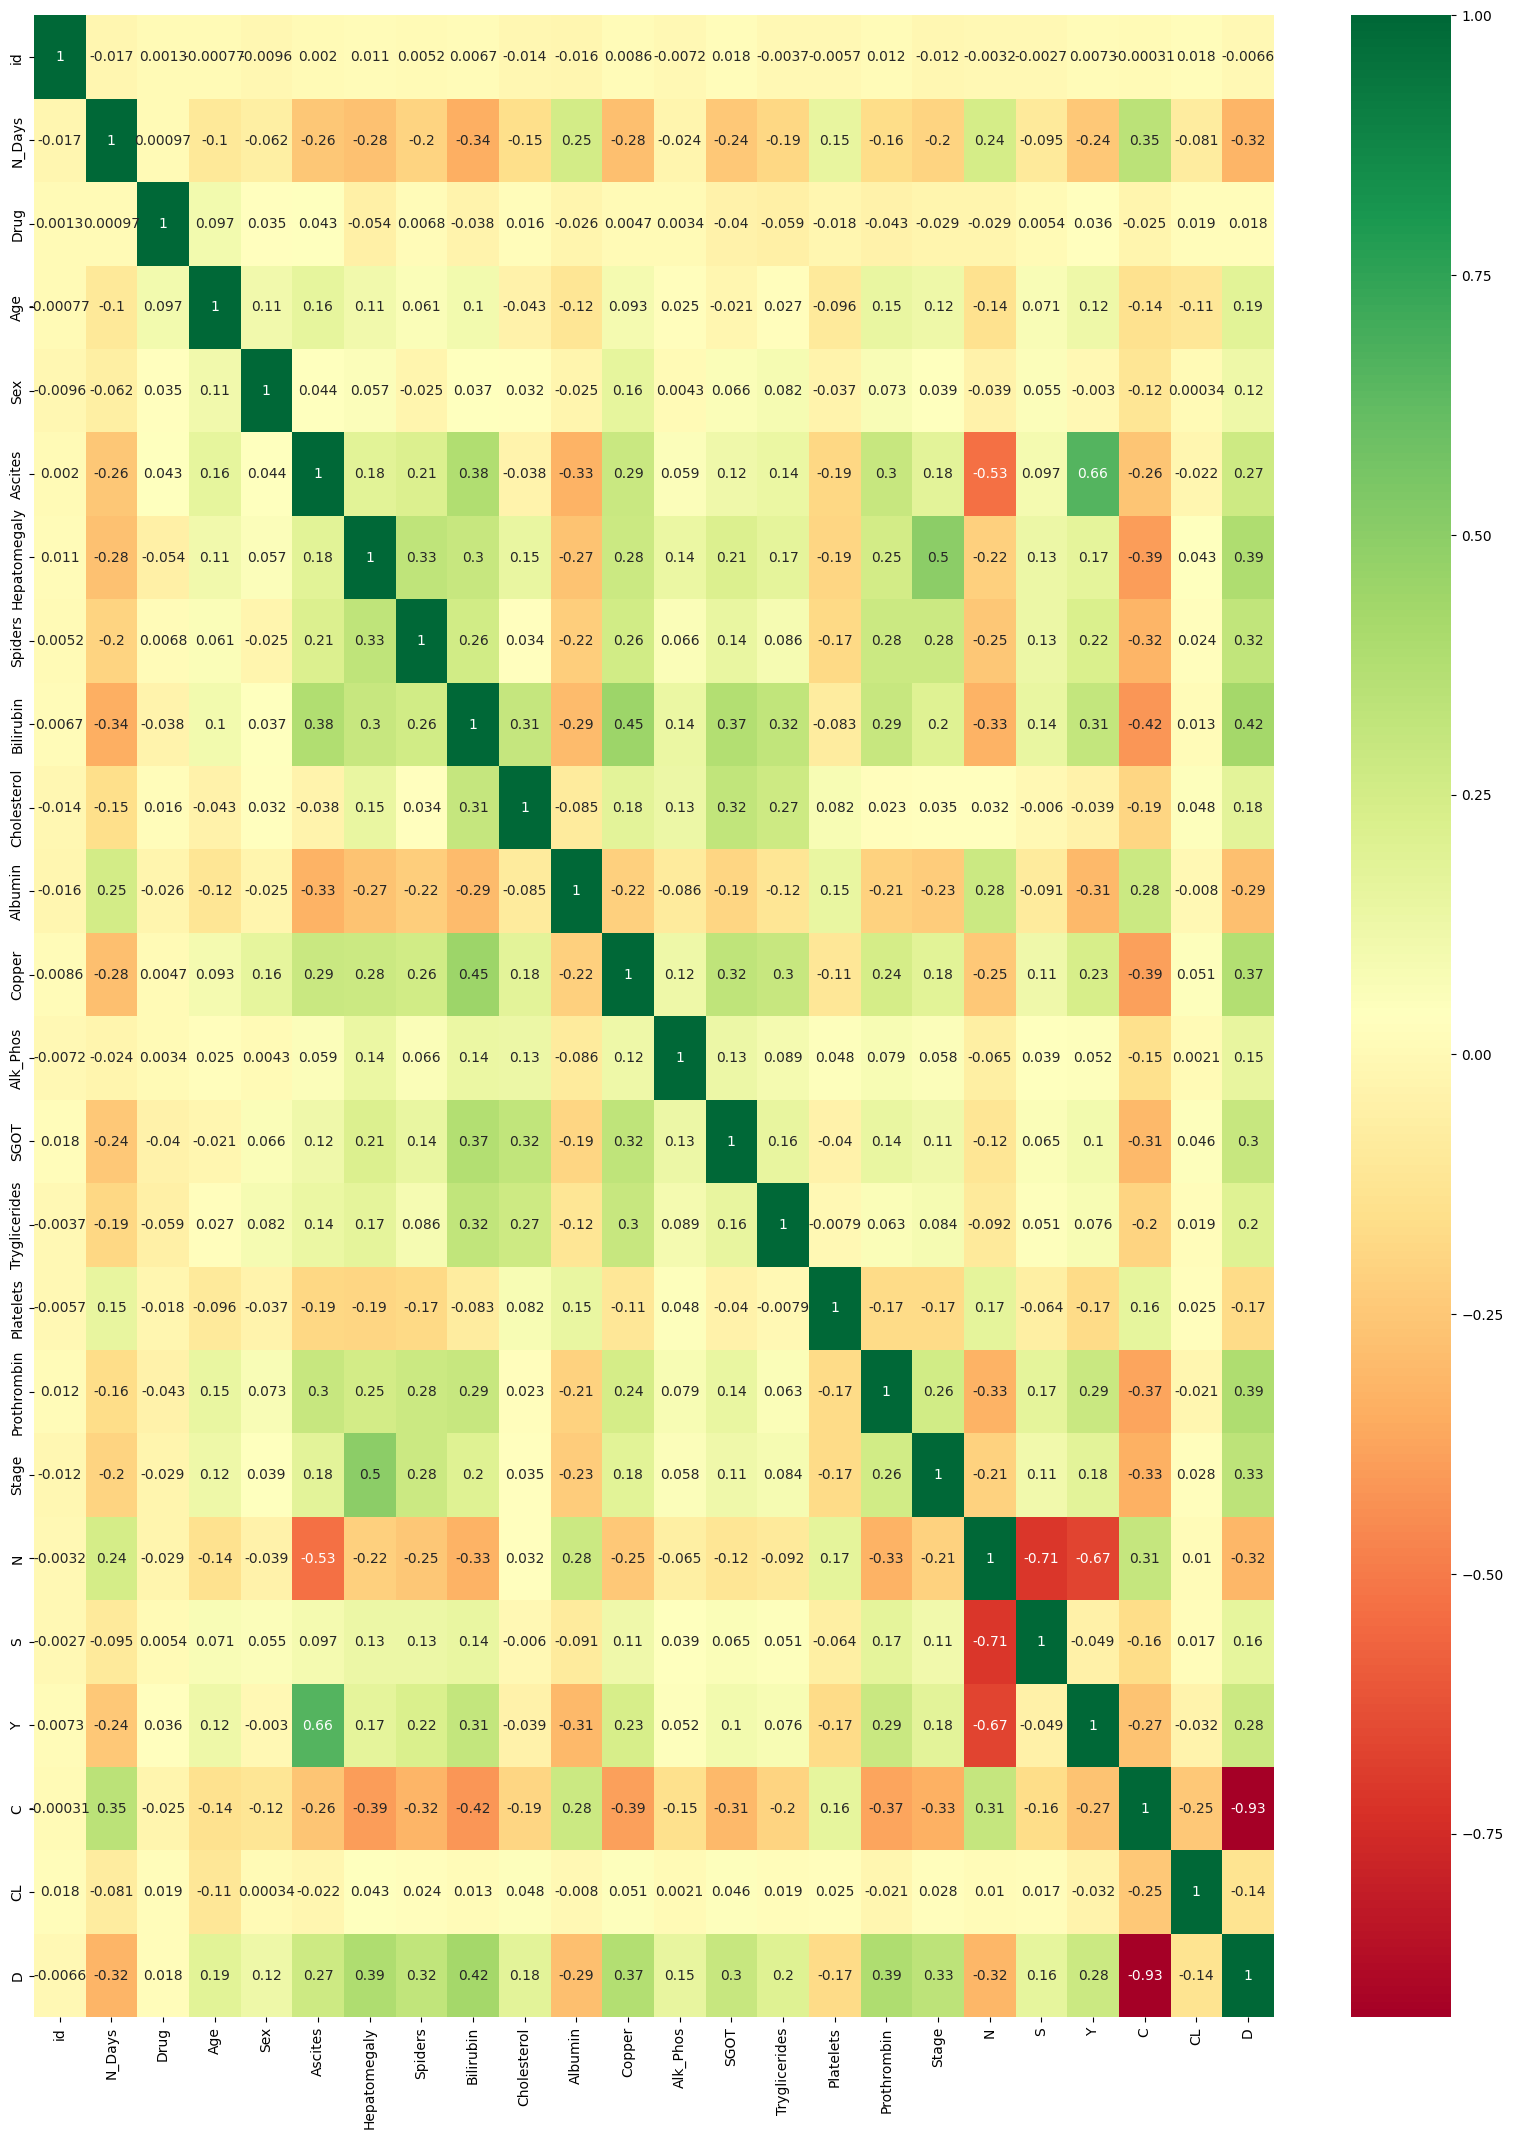

In [31]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [32]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

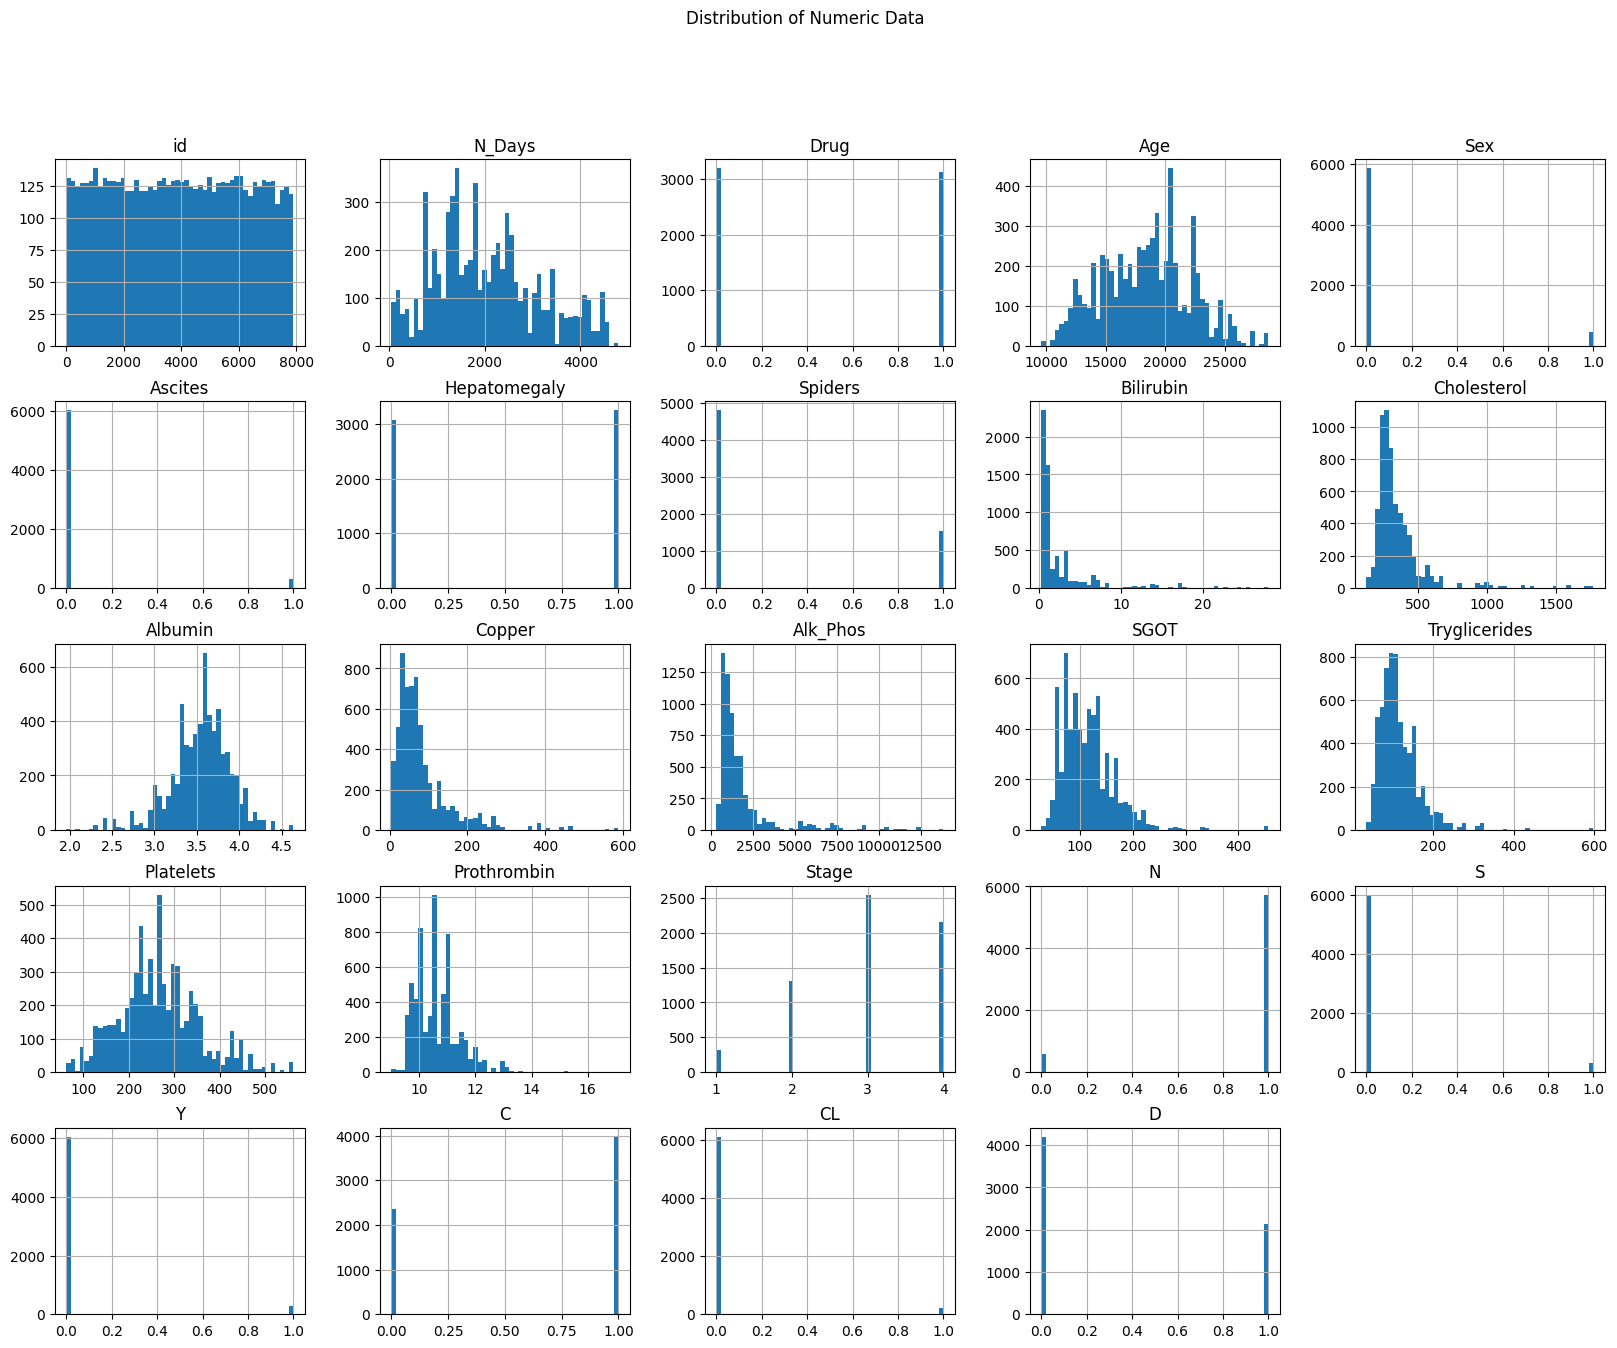

In [33]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [34]:
#Most of the data here needs to be normalised, mostly right skewed

In [35]:
# lets look at the ones that matter

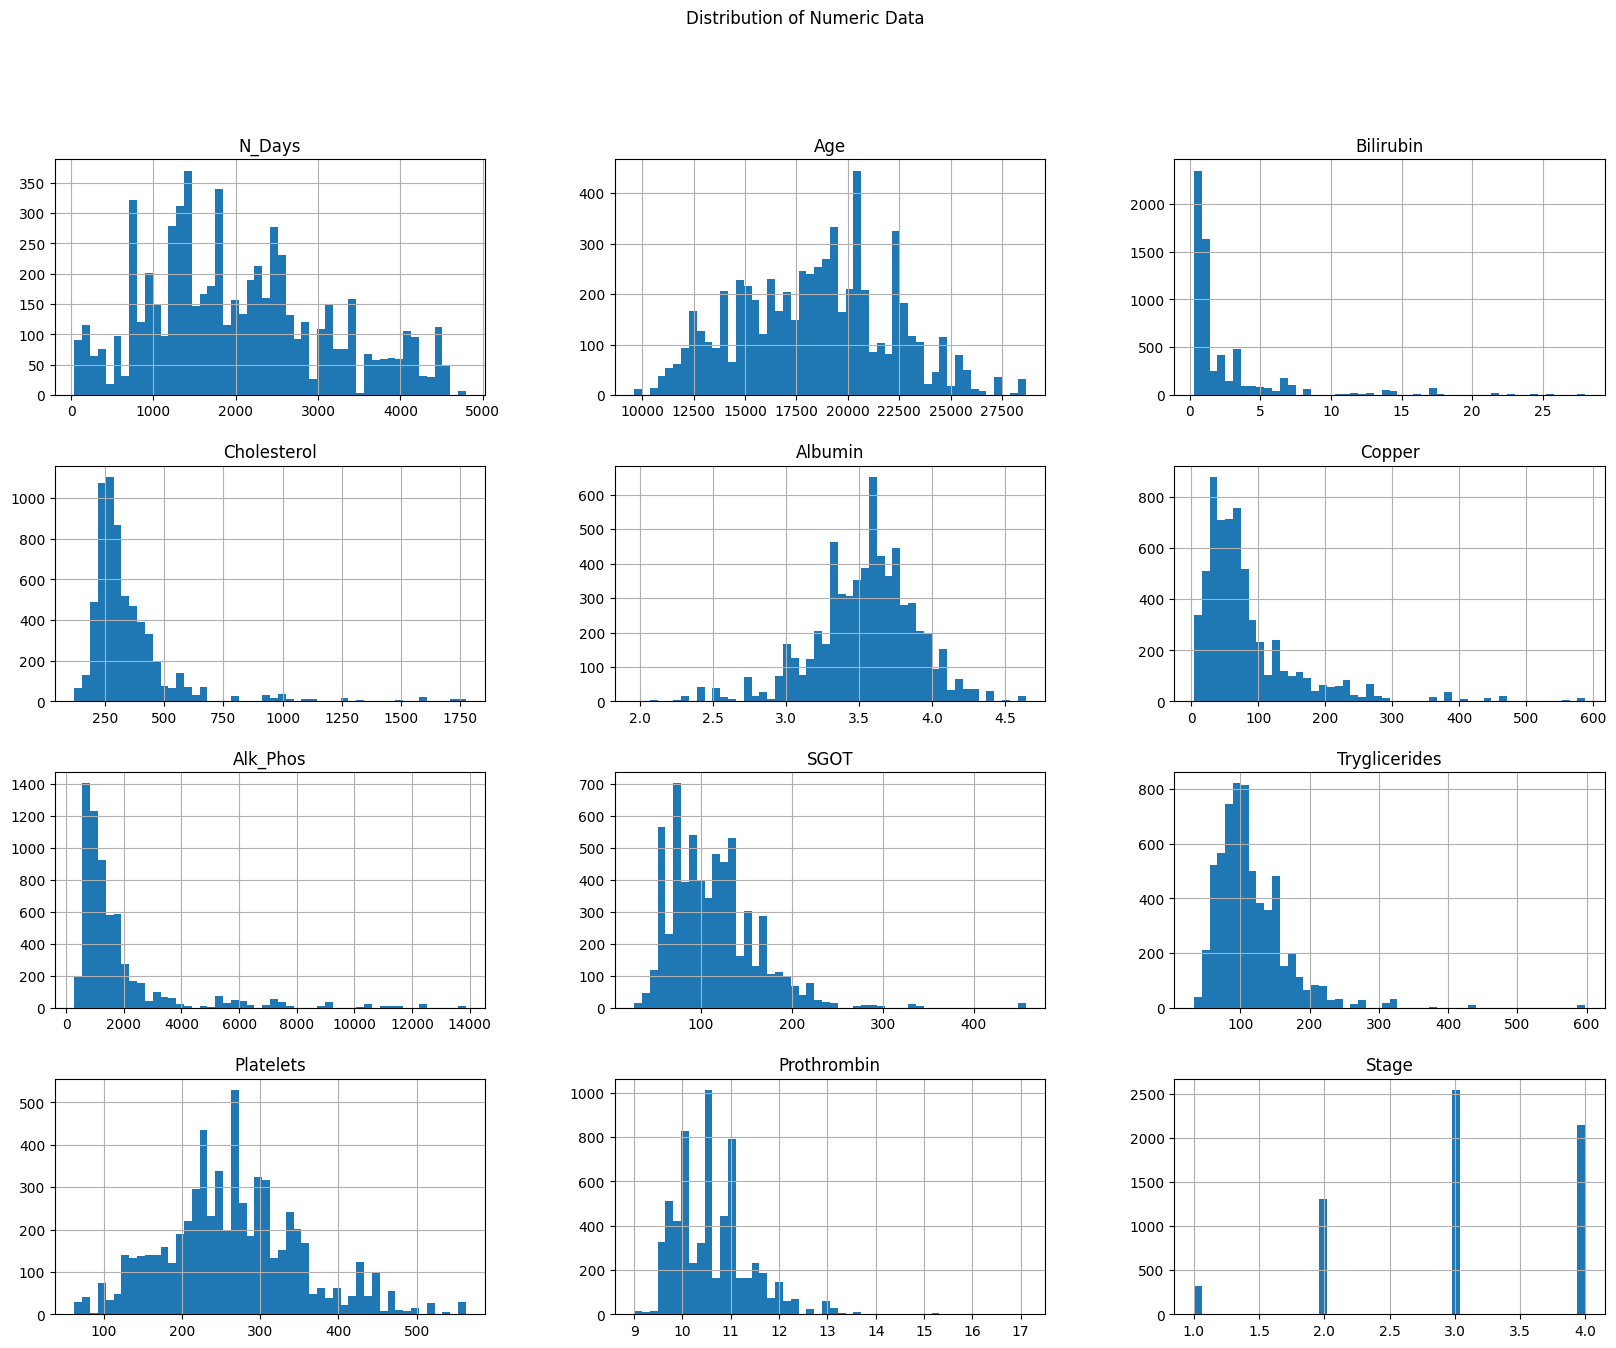

In [36]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [38]:
# viz after scaling

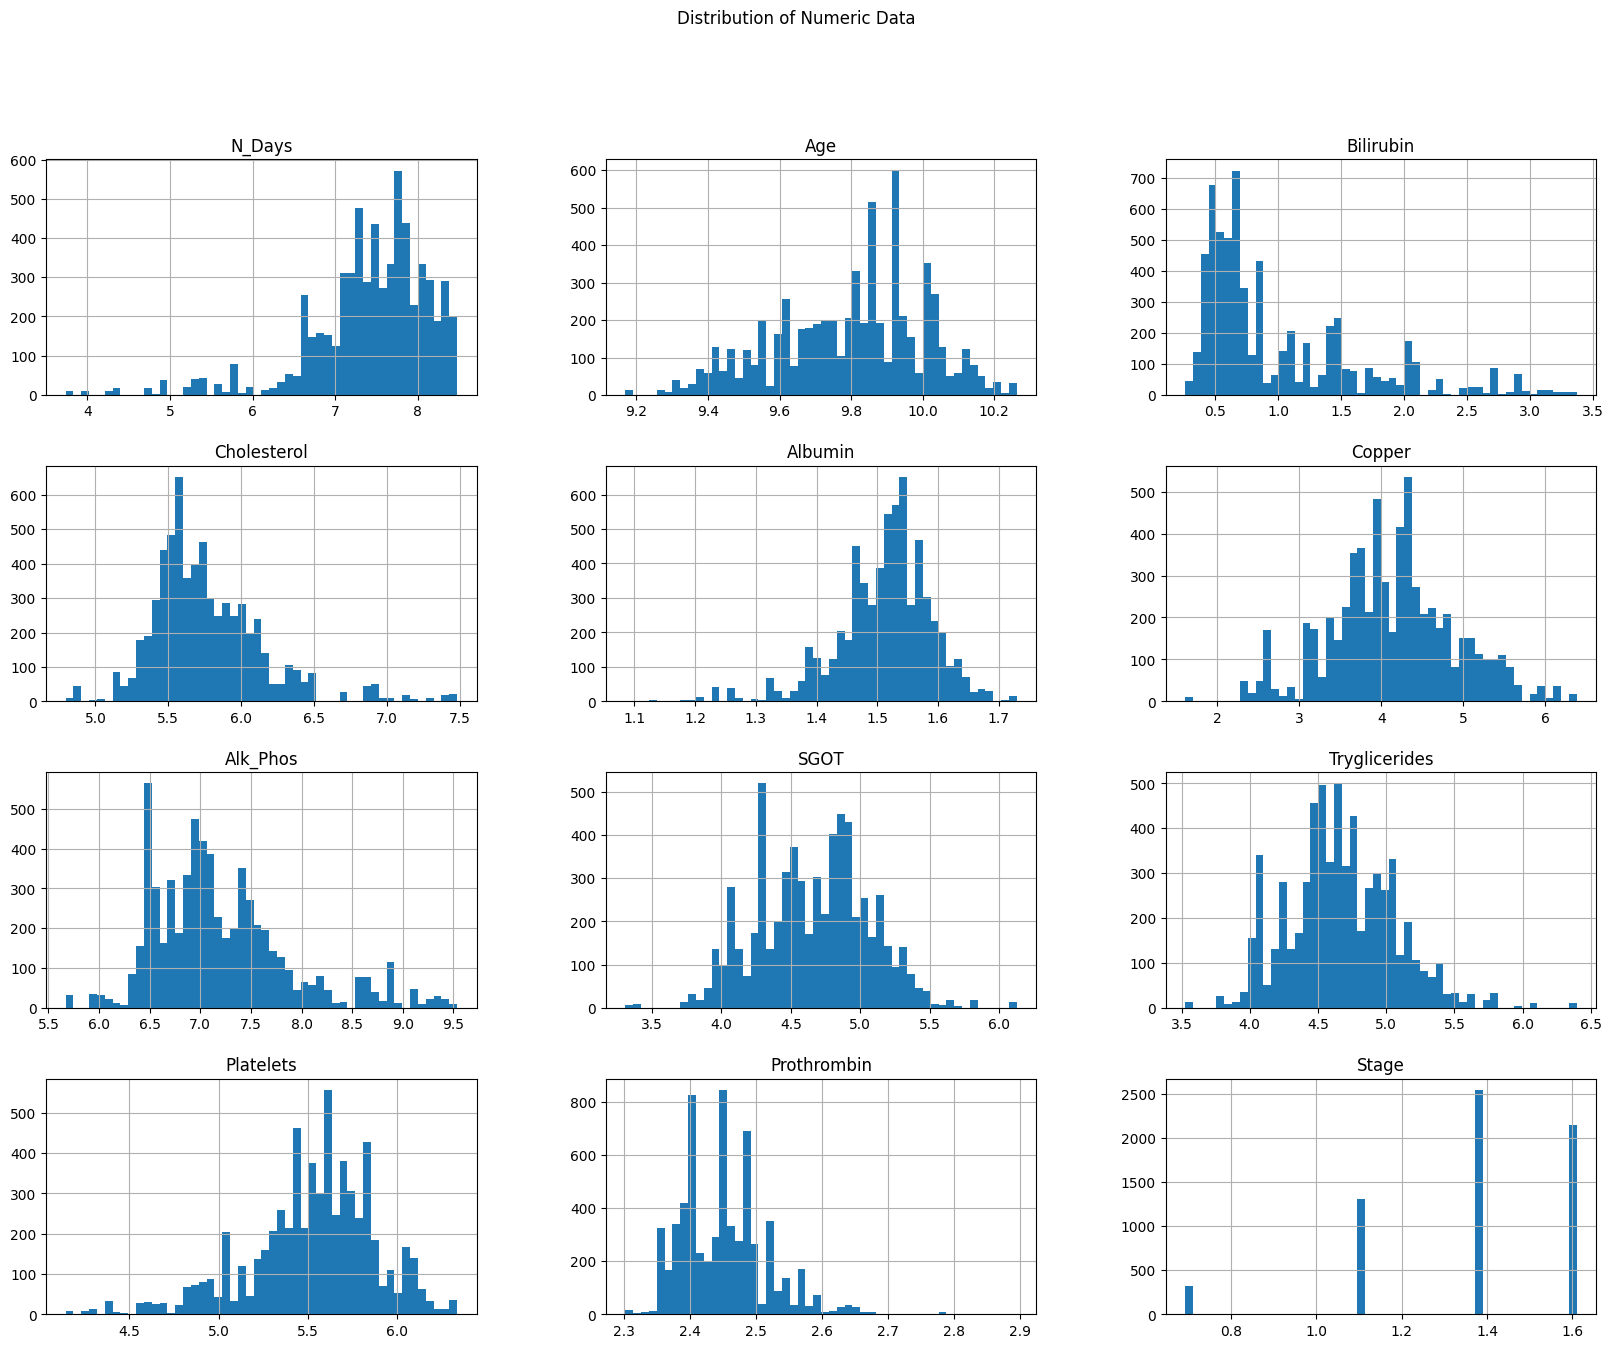

In [39]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [40]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

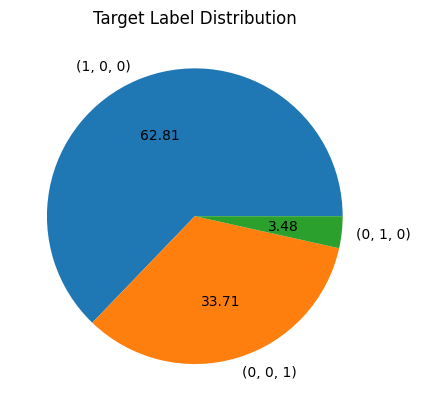

In [41]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [42]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [43]:
# for the next step i presume

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 1370 to 2849
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N    

In [45]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [46]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train, 0.1, 0.1)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 1370 to 2849
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6271 non-null   float64
 1   N_Days         6271 non-null   float64
 2   Drug           6264 non-null   float64
 3   Age            6270 non-null   float64
 4   Sex            6266 non-null   float64
 5   Ascites        6265 non-null   float64
 6   Hepatomegaly   6276 non-null   float64
 7   Spiders        6269 non-null   float64
 8   Bilirubin      6270 non-null   float64
 9   Cholesterol    6272 non-null   float64
 10  Albumin        6273 non-null   float64
 11  Copper         6267 non-null   float64
 12  Alk_Phos       6272 non-null   float64
 13  SGOT           6269 non-null   float64
 14  Tryglicerides  6271 non-null   float64
 15  Platelets      6280 non-null   float64
 16  Prothrombin    6283 non-null   float64
 17  Stage          6272 non-null   float64
 18  N    

In [48]:
NaN_count = train.isna().sum(axis = 0)
NaN_count

id               53
N_Days           53
Drug             60
Age              54
Sex              58
Ascites          59
Hepatomegaly     48
Spiders          55
Bilirubin        54
Cholesterol      52
Albumin          51
Copper           57
Alk_Phos         52
SGOT             55
Tryglicerides    53
Platelets        44
Prothrombin      41
Stage            52
N                56
S                50
Y                64
C                42
CL               46
D                55
dtype: int64

## KNN imputation 

In [49]:
from sklearn.impute import KNNImputer

In [54]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
1370,1370.0,8.130354,0.0,9.661097,0.0,0.0,0.0,0.0,0.788457,6.695799,1.560248,4.219508,6.580639,4.911551,4.927254,5.746203,2.406945,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
6118,6118.0,8.023225,1.0,9.855400,0.0,0.0,0.0,0.0,0.405465,5.605802,1.386294,3.044522,6.963190,4.864839,4.025352,5.877736,2.388763,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
1729,1729.0,6.989335,0.0,9.732640,0.0,0.0,1.0,0.0,1.098612,5.451038,1.547563,2.484907,7.337588,4.622519,4.605170,5.056246,2.557227,1.609438,1.0,0.0,0.0,0.0,0.0,1.0
2047,2047.0,7.814400,1.0,9.871997,0.0,0.0,0.0,0.0,0.788457,5.888878,1.486140,4.219508,7.034388,4.751001,4.672829,5.743003,2.442347,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
301,301.0,7.805067,0.0,9.855400,1.0,0.0,1.0,0.0,0.832909,5.921578,1.388791,5.429346,7.448334,5.126342,4.912655,5.517453,2.564949,1.609438,0.0,1.0,0.0,0.0,1.0,0.0


In [50]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [51]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train)

In [52]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [53]:
# Check no values are missing 
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [56]:
KNN_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,1370.0,8.130354,0.0,9.661097,0.0,0.0,0.0,0.0,0.788457,6.695799,1.560248,4.219508,6.580639,4.911551,4.927254,5.746203,2.406945,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
1,6118.0,8.023225,1.0,9.855400,0.0,0.0,0.0,0.0,0.405465,5.605802,1.386294,3.044522,6.963190,4.864839,4.025352,5.877736,2.388763,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
2,1729.0,6.989335,0.0,9.732640,0.0,0.0,1.0,0.0,1.098612,5.451038,1.547563,2.484907,7.337588,4.622519,4.605170,5.056246,2.557227,1.609438,1.0,0.0,0.0,0.0,0.0,1.0
3,2047.0,7.814400,1.0,9.871997,0.0,0.0,0.0,0.0,0.788457,5.888878,1.486140,4.219508,7.034388,4.751001,4.672829,5.743003,2.442347,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
4,301.0,7.805067,0.0,9.855400,1.0,0.0,1.0,0.0,0.832909,5.921578,1.388791,5.429346,7.448334,5.126342,4.912655,5.517453,2.564949,1.609438,0.0,1.0,0.0,0.0,1.0,0.0
